[2024-12-20 Fiddler](https://thefiddler.substack.com/p/happy-almost-new-year-from-the-fiddler-f0b)
====================

Fiddler
-------
Just do it with code.

In [1]:
from functools import cache

@cache
def get_largest_set(target, summands):
    result = frozenset()
    for n in sorted(summands, reverse=true):
        nset = frozenset([n])
        summands -= nset
        if n == target and len(result) == 0:
            result = nset
        elif n < target:
            s = get_largest_set(target-n, summands)
            if len(s) > 0 and len(s) >= len(result):
                result = s | nset
    return result

In [2]:
if false:
    s = get_largest_set(2025, frozenset(prime_range(2025))) # this is kind of slow
else:
    s = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71,
         73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 139, 293]
print(f"{sum(s)} is the sum of {len(s)} primes: {sorted(s)}")

2025 is the sum of 32 primes: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 139, 293]


The smallest prime not in this list is 127, so the only ways to expand this list are to
divide 139 or 293 into 3 primes, or divide 432 = 139+293 into 4 primes.  Since 1/3
of 139 and 293 are less than 127 and 1/4 of 432 is less than 127, the greatest
number of distinct primes summing to 2025 is 32.

Extra credit
------------
I don't know computationally feasible way to find a set of 20.

However, given a set of 20, I can assign to each of them a different one of 

    {1,2,3}
    {1,2,4}
    {1,4,6}
    {1,5,6}
    {1,3,5}
    {2,3,7}
    {2,7,8}
    {3,7,10}
    {2,4,8}
    {7,8,9}
    {7,9,10}
    {3,5,10}
    {4,8,11}
    {8,9,11}
    {9,11,12}
    {9,10,12}
    {5,10,12}
    {4,6,11}
    {6,11,12}
    {5,6,12}

according the algorithm defined in ```generate_faces``` below,
which can then be arranged on a dodecahedron's vertices as shown here:

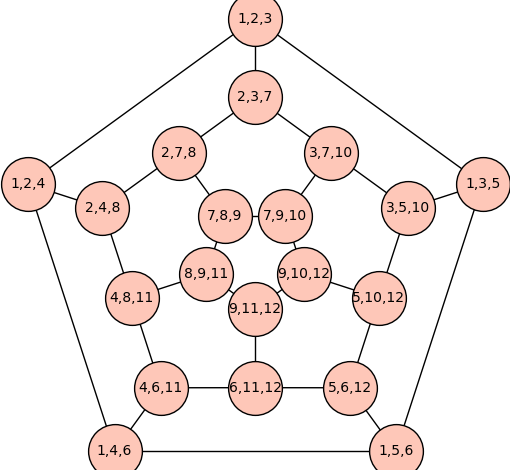

In [3]:
g = graphs.DodecahedralGraph()
g.relabel({
    0: '1,2,3',   1: '1,2,4',   2: '1,4,6',    3: '1,5,6',   19:'1,3,5',
    10:'2,3,7',   9: '2,7,8',   11:'3,7,10',   8: '2,4,8',   13:'7,8,9',
    12:'7,9,10',  18:'3,5,10',  7: '4,8,11',   14:'8,9,11',  15:'9,11,12',
    16:'9,10,12', 17:'5,10,12', 6: '4,6,11',   5: '6,11,12', 4: '5,6,12',
})
g.plot(vertex_size=1500)

In [4]:
pset = frozenset([
    frozenset([1,2,3]),
    frozenset([1,2,4]),
    frozenset([1,4,6]),
    frozenset([1,5,6]),
    frozenset([1,3,5]),
    frozenset([2,3,7]),
    frozenset([2,7,8]),
    frozenset([3,7,10]),
    frozenset([2,4,8]),
    frozenset([7,8,9]),
    frozenset([7,9,10]),
    frozenset([3,5,10]),
    frozenset([4,8,11]),
    frozenset([8,9,11]),
    frozenset([9,11,12]),
    frozenset([9,10,12]),
    frozenset([5,10,12]),
    frozenset([4,6,11]),
    frozenset([6,11,12]),
    frozenset([5,6,12]),
])

def sums_to_2025(face):
    if len(face) != 5:
        return false
    p = list(face)[0]
    for f in face:
        p &= f
    return len(p) == 1

In [5]:
def generate_faces(pset20):
    count = 0
    for p123 in pset20:
      if count != 0:
          print(count)
          return
      p = frozenset([p123])
      f11 = p
      f12 = p
      f13 = p
      pset19 = pset20 - p
      for p124 in pset19:
        p = frozenset([p124])
        f21 = f11 | p
        f22 = f12 | p
        f14 = p
        pset18 = pset19 - p
        for p146 in pset18:
          p = frozenset([p146])
          f31 = f21 | p
          f24 = f14 | p
          f16 = p
          pset17 = pset18 - p
          for p156 in pset17:
            p = frozenset([p156])
            f41 = f31 | p
            f15 = p
            f26 = f16 | p
            pset16 = pset17 - p
            for p135 in pset16:
              p = frozenset([p135])
              f51 = f41 | p
              if not sums_to_2025(f51):
                  continue
              f23 = f13 | p
              f25 = f15 | p
              pset15 = pset16 - p
              for p237 in pset15:
                p = frozenset([p237])
                f32 = f22 | p
                f33 = f23 | p
                f17 = p
                pset14 = pset15 - p
                for p278 in pset14:
                  p = frozenset([p278])
                  f42 = f32 | p
                  f27 = f17 | p
                  f18 = p
                  pset13 = pset14 - p
                  for p37a in pset13:
                    p = frozenset([p37a])
                    f43 = f33 | p
                    f37 = f27 | p
                    f1a = p
                    pset12 = pset13 - p
                    for p248 in pset12:
                      p = frozenset([p248])
                      f52 = f42 | p
                      f34 = f24 | p
                      f28 = f18 | p
                      if not sums_to_2025(f52):
                          continue
                      pset11 = pset12 - p
                      for p789 in pset11:
                        p = frozenset([p789])
                        f47 = f37 | p
                        f38 = f28 | p
                        f19 = p
                        pset10 = pset11 - p
                        for p79a in pset10:
                          p = frozenset([p79a])
                          f57 = f47 | p
                          f29 = f19 | p
                          f2a = f1a | p
                          if not sums_to_2025(f57):
                              continue
                          pset9 = pset10 - p
                          for p35a in pset9:
                            p = frozenset([p35a])
                            f53 = f43 | p
                            f35 = f25 | p
                            f3a = f2a | p
                            if not sums_to_2025(f53):
                                continue
                            pset8 = pset9 - p
                            for p48b in pset8:
                              p = frozenset([p48b])
                              f44 = f34 | p
                              f48 = f38 | p
                              f1b = p
                              pset7 = pset8 - p
                              for p89b in pset7:
                                p = frozenset([p89b])
                                f58 = f48 | p
                                f39 = f29 | p
                                f2b = f1b | p
                                if not sums_to_2025(f58):
                                    continue
                                pset6 = pset7 - p
                                for p9bc in pset6:
                                  p = frozenset([p9bc])
                                  f49 = f39 | p
                                  f3b = f2b | p
                                  f1c = p
                                  pset5 = pset6 - p
                                  for p9ac in pset5:
                                    p = frozenset([p9ac])
                                    f59 = f49 | p
                                    f4a = f3a | p
                                    f2c = f1c | p
                                    if not sums_to_2025(f59):
                                        continue
                                    pset4 = pset5 - p
                                    for p5ac in pset4:
                                      p = frozenset([p5ac])
                                      f45 = f35 | p
                                      f5a = f4a | p
                                      f3c = f2c | p
                                      if not sums_to_2025(f5a):
                                          continue
                                      pset3 = pset4 - p
                                      for p46b in pset3:
                                        p = frozenset([p46b])
                                        f54 = f44 | p
                                        f36 = f26 | p
                                        f4b = f3b | p
                                        if not sums_to_2025(f54):
                                            continue
                                        pset2 = pset3 - p
                                        for p6bc in pset2:
                                          p = frozenset([p6bc])
                                          f46 = f36 | p
                                          f5b = f4b | p
                                          f4c = f3c | p
                                          if not sums_to_2025(f5b):
                                              continue
                                          pset1 = pset2 - p
                                          for p56c in pset1:
                                            p = frozenset([p56c])
                                            f55 = f45 | p
                                            f56 = f46 | p
                                            f5c = f4c | p
                                            if not sums_to_2025(f55):
                                                continue
                                            if not sums_to_2025(f56):
                                                continue
                                            if not sums_to_2025(f5c):
                                                continue
                                            yield (f51,f52,f53,f54,f55,f56,f57,f58,f59,f5a,f5b,f5c)

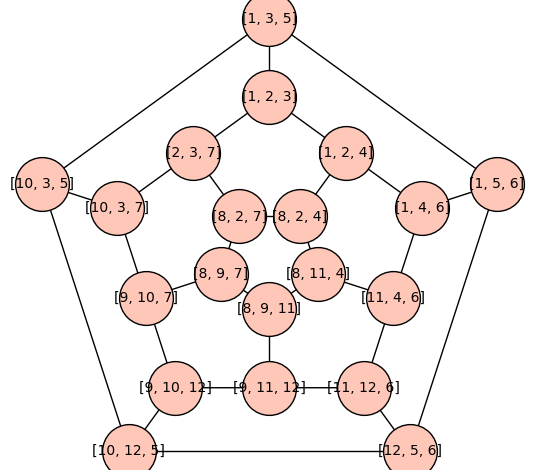

In [6]:
g = graphs.DodecahedralGraph()
for faces in generate_faces(pset):
    (f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc) = faces
    g.relabel({
        0: f"{list(list(f1&f2&f3)[0])}",
        1: f"{list(list(f1&f2&f4)[0])}",
        2: f"{list(list(f1&f4&f6)[0])}",
        3: f"{list(list(f1&f5&f6)[0])}",
        4: f"{list(list(f5&f6&fc)[0])}",
        5: f"{list(list(f6&fb&fc)[0])}",
        6: f"{list(list(f4&f6&fb)[0])}",
        7: f"{list(list(f4&f8&fb)[0])}",
        8: f"{list(list(f2&f4&f8)[0])}",
        9: f"{list(list(f2&f7&f8)[0])}",
        10:f"{list(list(f2&f3&f7)[0])}",
        11:f"{list(list(f3&f7&fa)[0])}",
        12:f"{list(list(f7&f9&fa)[0])}",
        13:f"{list(list(f7&f8&f9)[0])}",
        14:f"{list(list(f8&f9&fb)[0])}",
        15:f"{list(list(f9&fb&fc)[0])}",
        16:f"{list(list(f9&fa&fc)[0])}",
        17:f"{list(list(f5&fa&fc)[0])}",
        18:f"{list(list(f3&f5&fa)[0])}",
        19:f"{list(list(f1&f3&f5)[0])}",
    })
    break
g.plot(vertex_size=1500)

### Attempt at finding a set of 20

In [7]:
def find_2(n, summands):
    for i in summands:
        if 2*i < n and n-i in summands:
            yield frozenset([i,n-i])

def face1s():
    for p1 in prime_range(1000,2000):
        for s1 in [810..2025-p1]:
            s2 = 2025 - p1 - s1
            for p23 in find_2(s1, frozenset(prime_range(s1)) - frozenset([p1])):
                for p45 in find_2(s2, frozenset(prime_range(s2)) - frozenset([p1]) - p23):
                    yield frozenset([p1]) | p23 | p45

In [8]:
def test(g,drop=0,disp=5):
    iter = g.__iter__()
    for i in range(drop):
        item = next(iter,None)
        if item == None:
            return None
    for i in range(disp):
        item = next(iter,None)
        if item == None:
            return None
        print(item)
    return item

f1 = test(face1s())

frozenset({1009, 7, 199, 797, 13})
frozenset({1009, 163, 797, 43, 13})
frozenset({1009, 67, 797, 139, 13})
frozenset({1009, 797, 13, 79, 127})
frozenset({1009, 97, 109, 797, 13})


Given a set of 5 primes, find adjoining sets.

In [9]:
def find_3(target, summands):
    for i in summands:
        for s in find_2(target-i,summands - frozenset([i])):
            yield s | frozenset([i])

def face2s(face1):
    join = frozenset(list(face1)[:2])
    n = 2025 - sum(join)
    for p in find_3(n, frozenset(prime_range(n)) - face1):
        yield join | p

In [10]:
f2 = test(face2s(f1))
(f1,f2)

frozenset({1009, 97, 3, 5, 911})
frozenset({1009, 97, 3, 887, 29})
frozenset({1009, 97, 3, 53, 863})
frozenset({1009, 97, 3, 857, 59})
frozenset({1009, 97, 3, 89, 827})


(frozenset({13, 97, 109, 797, 1009}), frozenset({3, 89, 97, 827, 1009}))

In [11]:
def face3s(face1, face2):
    edge = face1 & face2
    for p1 in face1&face2:
        for p2 in face1-face2:
            for p3 in face2-face1:
                n = 2025 - p1 - p2 - p3
                for p in find_2(n, frozenset(prime_range(n)) - face1 - face2):
                    yield frozenset([p1,p2,p3]) | p

In [12]:
f3 = test(face3s(f1,f2))
(f1,f2,f3)

frozenset({1009, 17, 113, 89, 797})
frozenset({1009, 23, 89, 107, 797})
frozenset({1009, 29, 101, 89, 797})
frozenset({1009, 83, 89, 797, 47})
frozenset({1009, 71, 89, 59, 797})


(frozenset({13, 97, 109, 797, 1009}),
 frozenset({3, 89, 97, 827, 1009}),
 frozenset({59, 71, 89, 797, 1009}))

In [13]:
def d20(faces):
    g = graphs.DodecahedralGraph()
    f1 = faces[0]
    f2 = faces[1]
    f3 = faces[2]
    relabel = {}
    for i in [0..19]:
        relabel[i] = f"#{i}#"
    relabel[10] = f"{list(f1&f2&f3)}"
    relabel[9] = f"{list(f1&f2-f3)}"
    relabel[11] = f"{list(f1&f3-f2)}"
    relabel[0] = f"{list(f2&f3-f1)}"
    relabel[12] = f"#12#{list(f1-f2-f3)}"
    relabel[13] = f"#13#{list(f1-f2-f3)}"
    relabel[1] = f"#1#{list(f2-f1-f3)}"
    relabel[8] = f"#8#{list(f2-f1-f3)}"
    relabel[18] = f"#18#{list(f3-f1-f2)}"
    relabel[19] = f"#19#{list(f3-f1-f2)}"
    if len(faces) > 3:
        f4 = faces[3]
        relabel[1] = f"{list(f2-f1-f3-f4)}"
        relabel[8] = f"{list(f2&f4 - f1)}"
        relabel[13] = f"{list(f1&f4 - f2)}"
        relabel[12] = f"{list(f1-f2-f3-f4)}"
        relabel[7] = f"#7#{list(f4-f1-f2)}"
        relabel[14] = f"#14{list(f4-f1-f2)}"
    if len(faces) > 4:
        f5 = faces[4]
        relabel[7] = f"{list(f4-f1-f2-f5)}"
        relabel[14] = f"{list(f4&f5-f1)}"
        relabel[15] = f"#15#{list(f4-f1-f2)}"
        relabel[16] = f"#16#{list(f4-f1-f2)}"
    if len(faces) > 5:
        f6 = faces[5]
        relabel[18] = f"{list(f3&f6-f1)}"
        relabel[19] = f"{list(f3-f1-f2-f6)}"
        relabel[16] = f"{list(f5&f6-f1)}"
        relabel[15] = f"{list(f5-f4-f1-f6)}"
        relabel[17] = f"{list(f6-f1-f3-f5)}"
    if len(faces) > 6:
        f7 = faces[6]
        relabel[6] = f"#6#{list(f7-f2-f4)}"
        relabel[2] = f"#2#{list(f7-f2-f4)}"
    if len(faces) > 7:
        f8 = faces[7]
        relabel[6] = f"{list(f7&f8-f4)}"
        relabel[2] = f"{list(f7-f2-f4-f8)}"
        relabel[5] = f"{list(f8-f7-f4-f5)}"
    if len(faces) > 8:
        f9 = faces[8]
        relabel[4] = f"{list(f9-f8-f5-f6)}"
    if len(faces) > 9:
        f10 = faces[9]
        relabel[3] = f"{list(f10-f3-f6-f9)}"
    g.relabel(relabel)
    return g.plot(vertex_size=500)

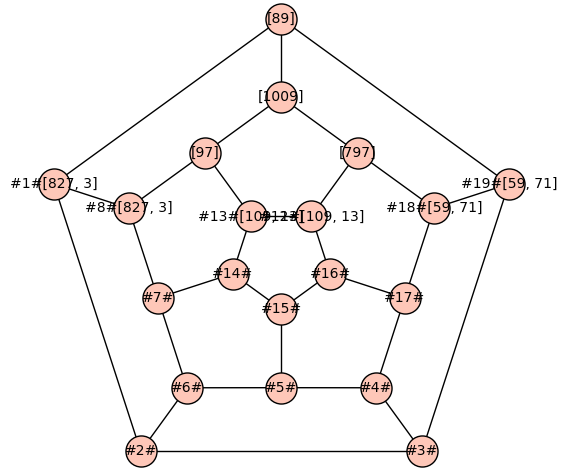

In [14]:
d20((f1,f2,f3))

In [15]:
def face4s(face1,face2,face3):
    for p1 in face1&face2-face3:
        for p2 in face1-face2-face3:
            for p3 in face2-face1-face3:
                n = 2025 - p1 - p2 - p3
                for p in find_2(n, frozenset(prime_range(n)) - face1 - face2 - face3):
                    yield frozenset([p1,p2,p3]) | p

In [16]:
f4 = test(face4s(f1,f2,f3))
(f1,f2,f3,f4)

frozenset({97, 919, 73, 827, 109})
frozenset({97, 853, 827, 139, 109})
frozenset({97, 163, 829, 827, 109})
frozenset({97, 811, 181, 827, 109})
frozenset({97, 769, 827, 109, 223})


(frozenset({13, 97, 109, 797, 1009}),
 frozenset({3, 89, 97, 827, 1009}),
 frozenset({59, 71, 89, 797, 1009}),
 frozenset({97, 109, 223, 769, 827}))

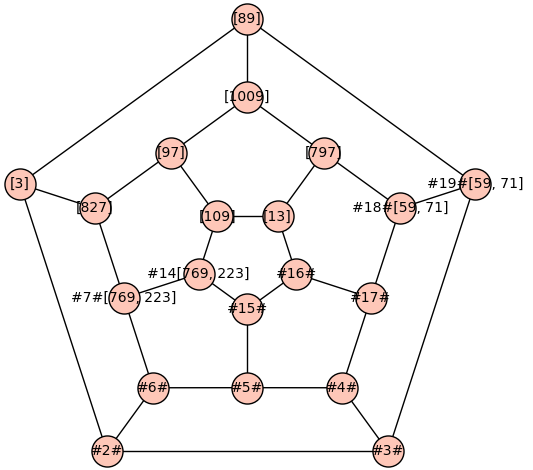

In [17]:
d20((f1,f2,f3,f4))

In [18]:
def face5s(face1,face2,face3,face4):
    for p1 in face1&face4 - face2:
        for p2 in face1-face2-face3-face4:
            for p3 in face4-face1-face2:
                n = 2025 - p1 - p2 - p3
                for p in find_2(n, frozenset(prime_range(n)) - face1 - face2 - face3 - face4):
                    yield frozenset([p1,p2,p3]) | p

In [19]:
f5 = test(face5s(f1,f2,f3,f4))

frozenset({769, 109, 5, 1129, 13})
frozenset({769, 109, 613, 521, 13})
frozenset({769, 1123, 109, 11, 13})
frozenset({769, 17, 1117, 109, 13})
frozenset({769, 593, 541, 109, 13})


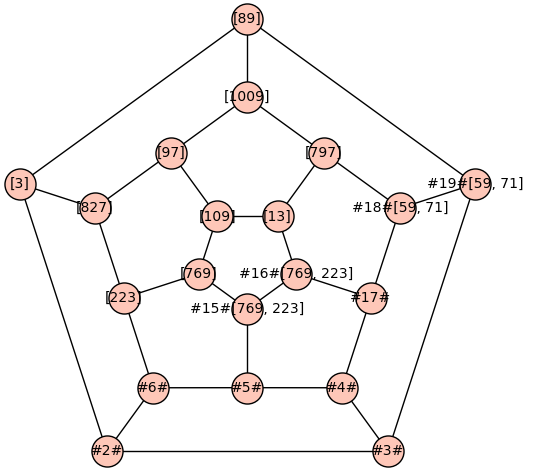

In [20]:
d20((f1,f2,f3,f4,f5))

In [21]:
def face6s(face1,face2,face3,face4,face5):
    for p1 in face1&face3-face2:
        for p2 in face1&face5-face4:
            for p3 in face3-face1-face2:
                for p4 in face5-face1-face4:
                    n = 2025 - p1 - p2 - p3 - p4
                    if is_prime(n) and n not in face1|face2|face3|face4|face5:
                        yield frozenset([p1,p2,p3,p4,n])

In [22]:
def test_f6():
    for f1 in face1s():
        for f2 in face2s(f1):
            for f3 in face3s(f1,f2):
                for f4 in face4s(f1,f2,f3):
                    for f5 in face5s(f1,f2,f3,f4):
                        for f6 in face6s(f1,f2,f3,f4,f5):
                            yield (f1,f2,f3,f4,f5,f6)

(f1,f2,f3,f4,f5,f6) = test(test_f6())
(f1,f2,f3,f4,f5,f6)

(frozenset({1009, 7, 199, 797, 13}), frozenset({1009, 983, 3, 23, 7}), frozenset({1009, 23, 937, 43, 13}), frozenset({3, 5, 1213, 7, 797}), frozenset({5, 1013, 199, 11, 797}), frozenset({199, 11, 43, 13, 1759}))
(frozenset({1009, 7, 199, 797, 13}), frozenset({1009, 983, 3, 23, 7}), frozenset({1009, 23, 937, 43, 13}), frozenset({3, 5, 1213, 7, 797}), frozenset({5, 1013, 199, 11, 797}), frozenset({199, 43, 13, 1013, 757}))
(frozenset({1009, 7, 199, 797, 13}), frozenset({1009, 983, 3, 23, 7}), frozenset({1009, 23, 937, 43, 13}), frozenset({3, 5, 1213, 7, 797}), frozenset({977, 5, 199, 797, 47}), frozenset({199, 937, 13, 47, 829}))
(frozenset({1009, 7, 199, 797, 13}), frozenset({1009, 983, 3, 23, 7}), frozenset({1009, 23, 937, 43, 13}), frozenset({3, 5, 1213, 7, 797}), frozenset({977, 5, 199, 797, 47}), frozenset({199, 43, 13, 47, 1723}))
(frozenset({1009, 7, 199, 797, 13}), frozenset({1009, 983, 3, 23, 7}), frozenset({1009, 23, 937, 43, 13}), frozenset({3, 5, 1213, 7, 797}), frozenset({5,

(frozenset({7, 13, 199, 797, 1009}),
 frozenset({3, 7, 23, 983, 1009}),
 frozenset({13, 23, 43, 937, 1009}),
 frozenset({3, 5, 7, 797, 1213}),
 frozenset({5, 53, 199, 797, 971}),
 frozenset({13, 53, 199, 823, 937}))

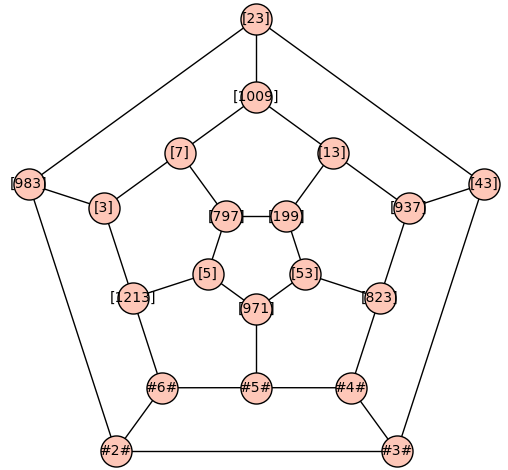

In [23]:
d20((f1,f2,f3,f4,f5,f6))

In [24]:
def face78s(face1,face2,face3,face4,face5,face6):
    for p1 in face2-face1-face3-face4:
        for p2 in face4&face2-face1-face5:
            for p3 in face4-face2-face1-face5:
                n = 2025 - p1 - p2 - p3
                for p in find_2(n, frozenset(prime_range(n)) - face1 - face2 - face3 - face4 - face5 - face6):
                    for p4 in p:
                        p5 = n - p4
                        p6 = 2025 - p3 - p4 - sum(face5-face1-face6)
                        if is_prime(p6) and p6 not in face1|face2|face3|face4|face5|face6|p:
                            yield (frozenset([p1, p2, p3]) | p, frozenset([p3,p4,p6]) | (face5-face1-face6))

In [25]:
def test_f78():
    for f1 in face1s():
        for f2 in face2s(f1):
            for f3 in face3s(f1,f2):
                for f4 in face4s(f1,f2,f3):
                    for f5 in face5s(f1,f2,f3,f4):
                        for f6 in face6s(f1,f2,f3,f4,f5):
                            for (f7,f8) in face78s(f1,f2,f3,f4,f5,f6):
                                yield (f1,f2,f3,f4,f5,f6,f7,f8)

(f1,f2,f3,f4,f5,f6,f7,f8) = test(test_f78())

(frozenset({1009, 7, 199, 797, 13}), frozenset({1009, 983, 3, 23, 7}), frozenset({1009, 23, 937, 43, 13}), frozenset({541, 3, 677, 7, 797}), frozenset({67, 421, 199, 797, 541}), frozenset({67, 199, 937, 809, 13}), frozenset({3, 677, 983, 283, 79}), frozenset({677, 421, 103, 283, 541}))
(frozenset({1009, 7, 199, 797, 13}), frozenset({1009, 983, 3, 23, 7}), frozenset({1009, 23, 937, 43, 13}), frozenset({541, 3, 677, 7, 797}), frozenset({67, 421, 199, 797, 541}), frozenset({67, 199, 937, 809, 13}), frozenset({3, 677, 983, 283, 79}), frozenset({307, 677, 421, 541, 79}))
(frozenset({1009, 7, 199, 797, 13}), frozenset({1009, 983, 3, 23, 7}), frozenset({1009, 23, 937, 43, 13}), frozenset({541, 3, 677, 7, 797}), frozenset({67, 421, 199, 797, 541}), frozenset({67, 199, 937, 809, 13}), frozenset({3, 677, 983, 139, 223}), frozenset({163, 677, 421, 541, 223}))
(frozenset({1009, 7, 199, 797, 13}), frozenset({1009, 983, 3, 23, 7}), frozenset({1009, 23, 937, 43, 13}), frozenset({541, 3, 677, 7, 797})

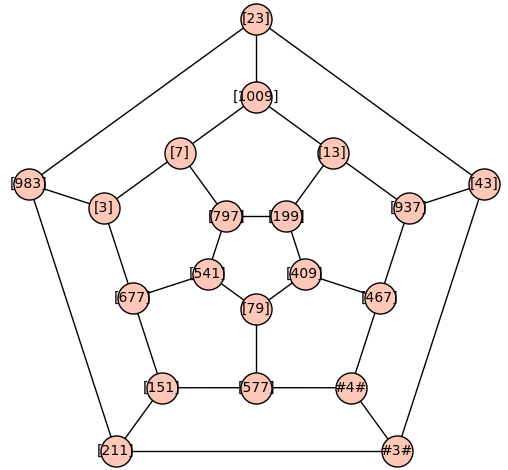

In [26]:
d20((f1,f2,f3,f4,f5,f6,f7,f8))

In [27]:
def face9101112s(face1,face2,face3,face4,face5,face6,face7,face8):
    p1 = 2025 - sum((face8|face5|face6)-face7-face4-face1-face2)
    p2 = 2025 - sum((face2|face3|face7)-face8-face4-face1-face6)
    if p1 == p2:
        return
    if not (is_prime(p1) and is_prime(p2)):
        return
    if p1 in face1|face2|face3|face4|face5|face6|face7|face8:
        return
    if p2 in face1|face2|face3|face4|face5|face6|face7|face8:
        return
    face9 = frozenset([p1]) | ((face8|face5|face6)-face7-face4-face1-face3)
    face12 = frozenset([p2]) | ((face2|face3|face7)-face8-face4-face1-face6)
    if sum(face12) != 2025:
        pass #return
    face10 = (face3|face6|face9|face12) - face1-face2-face4-face5-face7-face8
    face11 = (face7|face8|face9|face10|face12) - face1-face2-face3-face4-face5-face6
    yield(face9,face10,face11,face12)

In [28]:
def test_f9101112():
    for f1 in face1s():
        for f2 in face2s(f1):
            for f3 in face3s(f1,f2):
                for f4 in face4s(f1,f2,f3):
                    for f5 in face5s(f1,f2,f3,f4):
                        for f6 in face6s(f1,f2,f3,f4,f5):
                            for (f7,f8) in face78s(f1,f2,f3,f4,f5,f6):
                                for (f9,f10,f11,f12) in face9101112s(f1,f2,f3,f4,f5,f6,f7,f8):
                                    yield (f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,sum(f9) == 2025 and sum(f10) == 2025 and sum(f11) == 2025 and sum(f12) == 2025)

it = test_f9101112().__iter__()